In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [23]:
# cria um dataset com a temperatura e o uso do solo
def input(main):
    temperatura = np.loadtxt('../WRF/grade_completa/' + main)
    usodosolo = np.loadtxt('../WRF/grade_completa/uso_solo_d3.csv')
    df = pd.DataFrame({'temp':temperatura,'lulc':usodosolo})
    return df 

In [79]:
#calcula as temperaturas médias na superficie urbana e rural a partir do dataframe df
def t_med(df):
    af = df[df.lulc!=17]
    af = df[df.lulc!=11]
    af = df[df.lulc!=15]
    tr = af.temp[df.lulc!=13].mean()
    tu = af.temp[df.lulc==13].mean()
    return tr , tu

In [25]:
# plota um vetor com dados do dominio 3
def plot_grad3(icu):
    icu = icu.reshape(85,195)
    imagem = np.rot90(icu,2)
    imagem = np.flip(imagem,1)    
    plt.imshow(imagem, cmap='jet')
    plt.xticks(np.linspace(0,195,6),(-44.11, -43.8, -43.49, -43.18, -42.87,-42.25),fontsize = 14)
    plt.yticks(np.linspace(0,85,6),(-22.48,-22.6,-22.72,-22.84, -23.96, -23.22), fontsize = 14)
    plt.xlabel('Lon')
    plt.ylabel('Lat')
    plt.colorbar(shrink = 0.4)
    #plt.show()

In [75]:
# plota as intensidades de ICUs para o dom 3
from matplotlib import colors
def plot_icu_dv(icu):
    icu = icu.reshape(85,195)
    imagem = np.rot90(icu,2)
    imagem = np.flip(imagem,1) 
    bounds=[-6.-5-4,-3,-2,-1,0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, ncolors=256)    
    plt.imshow(imagem, cmap='plasma',norm=norm) #'viridis'
    plt.xticks(np.linspace(0,195,6),(-44.11, -43.8, -43.49, -43.18, -42.87,-42.25),fontsize = 16)
    plt.yticks(np.linspace(0,85,6),(-22.48,-22.6,-22.72,-22.84, -23.96, -23.22), fontsize = 16)
    plt.colorbar(shrink = 0.4)
    plt.xlabel('Lon')
    plt.ylabel('Lat')
    #plt.show()

In [27]:
#gf = input('comp_d3_t2_40.txt')

In [28]:
main = np.loadtxt('../WRF/grade_completa/main.txt', dtype='str')

In [94]:
#calculando tu
Tr = []
Tu = []
for i in main:
    df = input(i)
    tr, tu = t_med(df)
    Tr.append(tr)
    Tu.append(tu)

icu = pd.DataFrame({'Tu':Tu, 'Tr': Tr})

In [95]:
intensidade = icu.Tu - icu.Tr

In [96]:
# convertendo para C
icu = icu-273.15


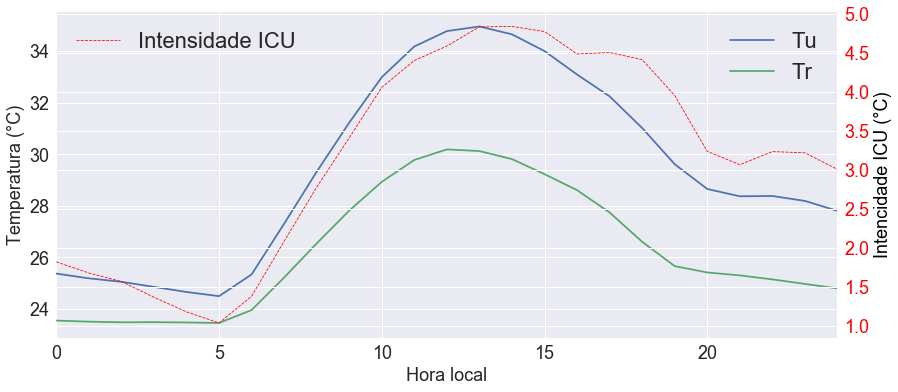

In [111]:
ax = icu.plot(figsize = (14,6),fontsize = 18)
plt.xlabel('Hora local', fontsize = 18)
plt.ylabel('Temperatura (°C)', fontsize = 18)
plt.legend(fontsize = 22)
ax1 = ax.twinx()
ax1.plot(intensidade, '--r',label = 'Intensidade ICU',lw=0.8)
plt.ylabel('Intencidade ICU (°C)', fontsize = 18, color='k')
ax1.tick_params(axis='y', colors='red',labelsize = 18)
plt.legend(fontsize = 22)

plt.savefig('../graficos/icu_intensidade.png')

# imagens

In [32]:
h00 = input('comp_d3_t2_28.txt')
h6 = input('comp_d3_t2_34.txt')
h12 = input('comp_d3_t2_40.txt')
h18 = input('comp_d3_t2_46.txt')
h24 = input('comp_d3_t2_52.txt')

In [33]:
H = [h00,h6,h12,h18,h24]

In [35]:
urbano = []
for i in h00.lulc.values:
    if i == 13:
        t = 4
    
    elif i == 17:
        t = 0 
    else:
        t = 2
    
    urbano.append(t)

urbano = np.array(urbano)

/home/pensario/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pensario/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


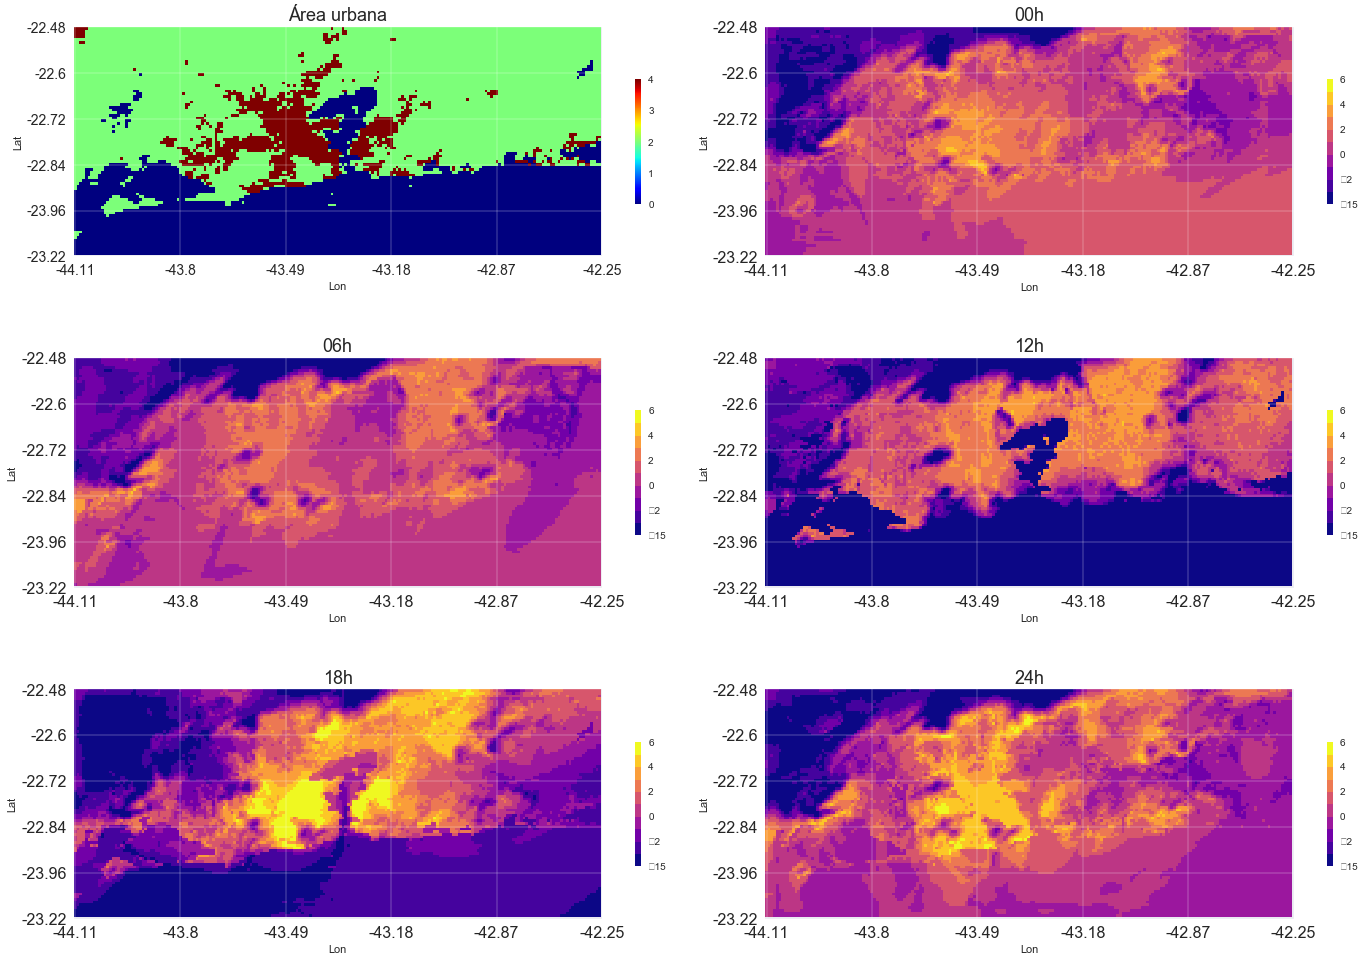

In [76]:
title = ['00h','06h','12h','18h','24h']
plt.style.use('seaborn') # 'bmh' 'default' 'Solarize_Light2' 'ggplot'
fig = plt.figure(figsize=(20,14))
#fig.suptitle('Intensidade ICU', fontsize = 28)
for i in range(len(H)):
    tr , tu = t_med(H[i])
    image = H[i] - tr 
    
    i =i + 2
    plt.subplot(3,2,i)    
    plot_icu_dv(image.temp.values)
    i =i - 2
    plt.title(title[i], fontsize = 18)
    plt.grid(True,lw=0.3)
    #i =i  1    

plt.subplot(3,2,1)
plot_grad3(urbano)
plt.title('Área urbana',fontsize = 18 )
plt.grid(True,lw=0.3)


plt.tight_layout()
    
#plt.savefig('../graficos/ICU_intensidade_map.png')

# shape

In [50]:
import rasterio as rio
import geopandas as gpd
import rasterio.plot

In [51]:
grade = rio.open('../WRF/grade_completa/usodolo_rep.tif')

In [52]:
vetor = gpd.read_file('../../dados_informacoes/vetores/dom3.shp')

In [53]:
temp1 = rio.open("../WRF/grade_completa/h00.tif")

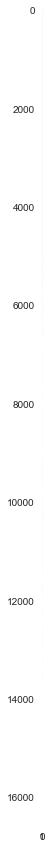

In [61]:
fig, ax = plt.subplots(figsize=(15, 15))
#r=rasterio.plot.show(temp1,ax=ax,cmap='plasma',)
#ax.imshow()
ax.imshow(image)
#vetor.plot(ax=ax,facecolor = 'none',edgecolor = 'white',lw =0.8)
#plt.colorbar(r)
plt.grid(lw=0.4)

In [42]:
grade.dtypes

('float64',)

In [13]:
 def creat_raster(name,array):
    raster = rio.open('../WRF/grade_completa/'+name,'w', driver='GTiff',
                      height=grade.shape[0],width=grade.shape[1],
                      count=1, dtype=grade.dtypes[0],
                      crs='EPSG:4326',transform=grade.transform)
    raster.write(array,1)
    raster.close()

In [43]:
name = ['t2_h00.tif', 't2_h06.tif','t2_h12.tif','t2_h18.tif','t2_h24.tif']

In [44]:
for i in range(len(name)):
    icu = H[i].temp.values.reshape(85,195) -tu
    imagem = np.rot90(icu,2)
    imagem = np.flip(imagem,1) 
    creat_raster(name[i],imagem)

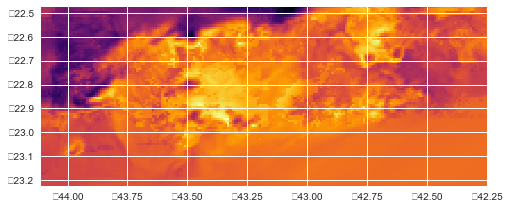

In [46]:

rasterio.plot.show(temp1,cmap = 'inferno')

In [62]:
icu = H[0].temp.values -tu
imagem = np.rot90(icu.reshape(85,195),2)
imagem = np.flip(imagem,1) 

# raster = rio.open('../WRF/grade_completa/h00.tif','w', driver='GTiff',
#                       height=grade.shape[0],width=grade.shape[1],
#                       count=1, dtype=grade.dtypes[0],
#                       crs='EPSG:4326',transform=grade.transform)
# raster.write(imagem,1)
# raster.close()

In [56]:
icu = h12.temp.values
icu = icu.reshape(85,195)
imagem = np.rot90(icu,2)

imagem = np.flip(imagem,1) 

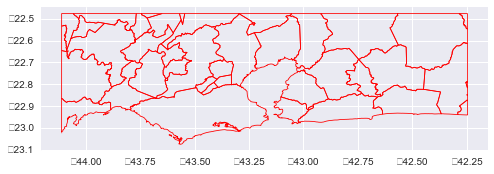

In [71]:
fig, ax = plt.subplots()
#
#ax.imshow(imagem)
vetor.plot(ax=ax,facecolor = 'none',edgecolor = 'red',lw =0.8)
